# Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

# [6.2.5] Parse a Response from an API

In [6]:
# For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame.
# 1. city, country, and date
# 2. latitude and longitude 
# 3. maximum temperature
# 4. humidity
# 5. cloudiness
# 6. wind speed

# [6.2.6] Get the City Weather Data

# Import Dependencies, and Initialize an Empty List and Counters

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25ef2d0f860a1c2cafdd546279980e90


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval         
---------------------------------------


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Conver the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experience, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------------------")
print("Data Retrieval Complete            ")
print("-----------------------------------------")

Beginning Data Retrieval         
---------------------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | ambanja
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | tahe
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | morgan city
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | amberley
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | sinjar
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | bulanash
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | datong
Processing Record 18 of Set 1 | deh rawud
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | oga
Processing Record 22 of Set 

Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | fougamou
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | nanning
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | changde
Processing Record 49 of Set 4 | jaisalmer
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | cimarron hills
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | acari
Processing Record 4 of Set 5 | san jose
Processing Record 5 of Set 5 | goderich
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | sampang
Processing Record 8 of Set 5 | verkhnyaya inta
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | ust-nera
Processing Record 11 of Set 5 | mehamn
Processing Record 12 of Set 5 | kavakli
Processing Record 13 of Set 5 | birao
Processing Record 14 of Set 5 | bengkulu
Processing Record 15 of Set 5 | guadalup

Processing Record 39 of Set 8 | buala
Processing Record 40 of Set 8 | malindi
Processing Record 41 of Set 8 | abu samrah
Processing Record 42 of Set 8 | beni suef
Processing Record 43 of Set 8 | dondo
Processing Record 44 of Set 8 | muscat
Processing Record 45 of Set 8 | ballina
Processing Record 46 of Set 8 | karpogory
Processing Record 47 of Set 8 | orlik
Processing Record 48 of Set 8 | stephenville
Processing Record 49 of Set 8 | bardiyah
Processing Record 50 of Set 8 | aykhal
Processing Record 1 of Set 9 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 9 | sibu
Processing Record 3 of Set 9 | tayshet
Processing Record 4 of Set 9 | lakes entrance
Processing Record 5 of Set 9 | kirakira
Processing Record 6 of Set 9 | hirara
Processing Record 7 of Set 9 | armacao dos buzios
City not found. Skipping...
Processing Record 8 of Set 9 | richards bay
Processing Record 9 of Set 9 | vila franca do campo
Processing Record 10 of Set 9 | maun
Processing Record 11 of Set 9 | t

Processing Record 25 of Set 12 | hat yai
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | detchino
Processing Record 28 of Set 12 | alto piquiri
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | brindisi
Processing Record 31 of Set 12 | coahuayana
Processing Record 32 of Set 12 | alghero
Processing Record 33 of Set 12 | ciudad bolivar
Processing Record 34 of Set 12 | hihifo
City not found. Skipping...
Processing Record 35 of Set 12 | kieta
Processing Record 36 of Set 12 | nhulunbuy
Processing Record 37 of Set 12 | warqla
City not found. Skipping...
Processing Record 38 of Set 12 | kilindoni
Processing Record 39 of Set 12 | westport
Processing Record 40 of Set 12 | egvekinot
Processing Record 41 of Set 12 | baglung
Processing Record 42 of Set 12 | ous
Processing Record 43 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 44 of Set 12 | kamenka
Processing Record 45 of Set 12 | kulhudhuffushi
Processing Record 46 of S

# [6.2.7] Create a DataFrame of City Weather Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-0.76,96,100,7.58,RU,2021-03-22 17:33:38
1,Kapaa,22.0752,-159.3190,71.60,53,1,17.27,US,2021-03-22 17:33:40
2,Komsomolskiy,40.4272,71.7189,53.60,50,100,4.61,UZ,2021-03-22 17:33:41
3,Ambanja,-13.6833,48.4500,76.15,92,100,3.09,MG,2021-03-22 17:33:45
4,New Norfolk,-42.7826,147.0587,57.99,68,79,1.81,AU,2021-03-22 17:33:46
5,Tahe,52.3333,124.7333,23.52,86,46,8.03,CN,2021-03-22 17:33:48
6,Barrow,71.2906,-156.7887,-20.20,63,1,8.05,US,2021-03-22 17:33:50
7,Morgan City,29.6994,-91.2068,73.99,73,75,16.11,US,2021-03-22 17:33:51
8,Kaitangata,-46.2817,169.8464,50.04,94,90,4.07,NZ,2021-03-22 17:33:52
9,Amberley,39.2048,-84.4280,68.00,42,1,6.91,US,2021-03-22 17:33:53


In [16]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df[new_column_order]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-0.76,96,100,7.58,RU,2021-03-22 17:33:38
1,Kapaa,22.0752,-159.3190,71.60,53,1,17.27,US,2021-03-22 17:33:40
2,Komsomolskiy,40.4272,71.7189,53.60,50,100,4.61,UZ,2021-03-22 17:33:41
3,Ambanja,-13.6833,48.4500,76.15,92,100,3.09,MG,2021-03-22 17:33:45
4,New Norfolk,-42.7826,147.0587,57.99,68,79,1.81,AU,2021-03-22 17:33:46


In [20]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# [6.3.1] Plot Latitude vs. Max Temperature

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

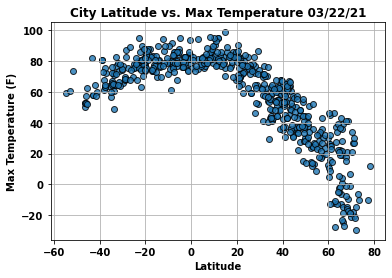

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# [6.3.2] Plot Latitude vs. Humidity

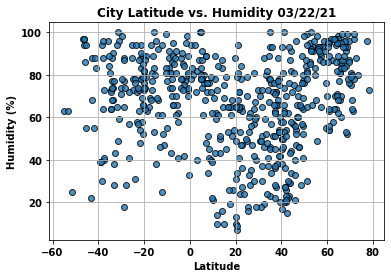

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# [6.3.3] Plot Latitude vs. Cloudiness

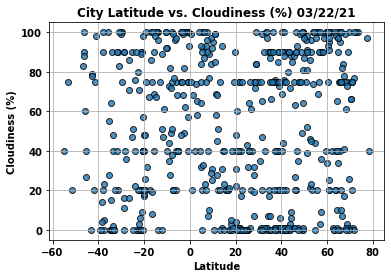

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# [6.3.4] Plot Latitude vs. Wind Speed

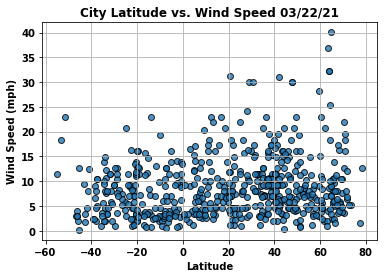

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()